In [ ]:
pip install pandas matplotlib

Some function usefull :

In [ ]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def columnPlot(data,x_col,y_col):
    
    sns.countplot(x=X, data=data)
    plt.xlabel(str(x_col))
    plt.ylabel(str(y_col))
    plt.title('Distribution of '+str(x_col)+" vs "+str(y_col))
    plt.show()
    return None

def PlotBubble(data,x_col,y_col,color="black"):
    df = pd.DataFrame(data)
    counts = df.groupby([x_col, y_col]).size().reset_index(name='count')
    fig, ax = plt.subplots()
    sns.scatterplot(x=x_col, y=y_col, size='count', sizes=(40, 500), data=counts, ax=ax, legend=False, color=color)
    plt.title("Graph of "+str(x_col)+" vs "+str(y_col))
    return None

def Plot3d(data, x_col,y_col):
    df = pd.DataFrame(data)

    counts = df.groupby([x_col, y_col]).size().reset_index(name='count')
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(counts[x_col], counts[y_col], counts['count'], cmap='viridis', linewidth=0.2, edgecolor='k')
    plt.title('3d graph of '+str(x_col)+' vs '+str(y_col))
    plt.show()
    return None

def meanData(data, mean, parameter):
    df = pd.DataFrame(data)
    average = df.groupby(mean)[parameter].mean()
    return average

Import of the dataset :

In [114]:
import pandas as pd

path = 'student-mat.csv'
data = pd.read_csv(path)

Study of the workday consumption of alcohol and correlation with grades :

In [ ]:
import csv
import pandas as pd

path = 'student-mat.csv'
data = pd.read_csv(path)


def meanData(data, mean, parameter):
    df = pd.DataFrame(data)
    average = df.groupby(mean)[parameter].mean()
    return average



G1mean = meanData(data,"Dalc","G1")
G2mean = meanData(data,"Dalc","G2")
G3mean = meanData(data,"Dalc","G3")
print("Average grades for students with a very low workday alcohol consumption")
print("G1 : "+str(G1mean.values[0]))
print("G2 : "+str(G2mean.values[0]))
print("G3 : "+str(G3mean.values[0]))
print("Average grades for students with a low workday alcohol consumption")
print("G1 : "+str(G1mean.values[1]))
print("G2 : "+str(G2mean.values[1]))
print("G3 : "+str(G3mean.values[1]))
print("Average grades for students with an average workday alcohol consumption")
print("G1 : "+str(G1mean.values[2]))
print("G2 : "+str(G2mean.values[2]))
print("G3 : "+str(G3mean.values[2]))
print("Average grades for students with a high workday alcohol consumption")
print("G1 : "+str(G1mean.values[3]))
print("G2 : "+str(G2mean.values[3]))
print("G3 : "+str(G3mean.values[3]))
print("Average grades for students with a very high workday alcohol consumption")
print("G1 : "+str(G1mean.values[4]))
print("G2 : "+str(G2mean.values[4]))
print("G3 : "+str(G3mean.values[4]))
print("We can see that the group with a very low workday alcohol consumption have better average grades than the other groups")
print("We can study if the consumption of alcohol is higher for the people with lower grades")


PlotBubble(data,"G1","Dalc","red")
PlotBubble(data,"G2","Dalc","green")
PlotBubble(data,"G3","Dalc","blue")

print("We can see in the graph that for every grades, the students with a very high workday alcohol consumption have grades between 5 and 15")
print("The part of the students with a very low workday alcohol consumption have grades between 0 and 20")
print("In resume, i can say that maybe the grades are not an important factor in the workday alcohol consumption")

Study of the consumption of alcohol and correlation with the sex of students :

There is 208 female students and 187 male students.
This makes a distribution of 47% and 53% around, so the distribution between the two sex is fair
We can see that there are slightly more women than men on the total figure, and yet in the graph we
can see that there are more men who drink a lot than women who drink a lot, and conversely there
are more women who drink little than men who drink little


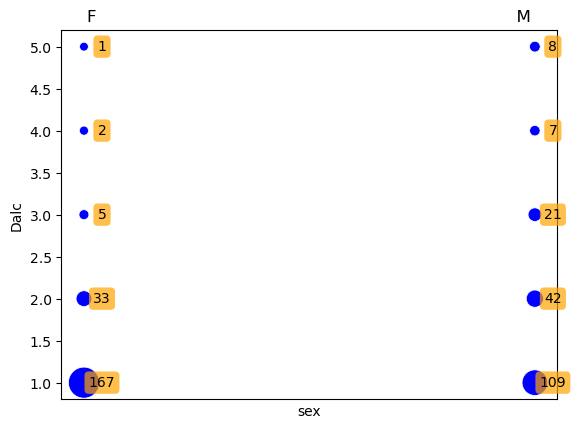

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = 'student-mat.csv'
data = pd.read_csv(path)

def PlotBubble(data, x_col, y_col, color="blue"):
    df = pd.DataFrame(data)
    counts = df.groupby([x_col, y_col]).size().reset_index(name='count')

    # Ajuster la position des bulles pour les catégories 'F' et 'M'
    counts[x_col] = counts[x_col].map({'F': -0.1, 'M': 0.1})

    fig, ax = plt.subplots()
    scatter = sns.scatterplot(x=x_col, y=y_col, size='count', sizes=(40, 500), data=counts, ax=ax, legend=False, color=color)

    # Annoter chaque point avec le nombre correspondant
    for line in range(0, counts.shape[0]):
        text_x = counts[x_col].iloc[line]
        text_y = counts[y_col].iloc[line]
        count_value = counts['count'].iloc[line]

        # Décaler le texte légèrement sur le côté
        text_x += 0.008

        scatter.text(text_x, text_y, count_value,
                     horizontalalignment='center', verticalalignment='center',
                     bbox=dict(facecolor='orange', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

    # Masquer l'axe x et afficher les libellés 'M' et 'F'
    ax.set(xticks=[])

    plt.title("F                                                                                M")
    plt.show()

sexcount=data['sex'].value_counts().values
print("There is "+str(sexcount[0])+" female students and "+str(sexcount[1])+" male students.")
print("This makes a distribution of 47% and 53% around, so the distribution between the two sex is fair")
print("We can see that there are slightly more women than men on the total figure, and yet in the graph we")
print("can see that there are more men who drink a lot than women who drink a lot, and conversely there")
print("are more women who drink little than men who drink little")

PlotBubble(data,"sex","Dalc")